In [6]:
from CoqGym.gallina import GallinaTermParser
from lark import Tree, Token
from pygments.lexers import CoqLexer
from functools import reduce

from typing import List, Tuple, Union

import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from griffon.preprocessing.pipeline.stage1.recreate_term import Stage1StatementCreator

In [7]:
term = '@eq nat ((fun a : nat => Nat.add a (S O)) n) (Nat.add (S O) n)'
sexp = '(App (Ind (((Mutind (MPfile (DirPath ((Id Peano) (Id Init) (Id Coq)))) (DirPath ()) (Id le)) 0) (Instance ()))) ((Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 1) (Instance ()))) (App (Fix (((0 0) 0) (((Name (Id tree_size)) (Name (Id forest_size))) ((Prod (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Prod (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ()))))) ((Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Case ((ci_ind ((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0)) (ci_npar 0) (ci_cstr_ndecls (2)) (ci_cstr_nargs (2)) (ci_pp_info ((ind_tags ()) (cstr_tags ((false false))) (style RegularStyle)))) (Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Rel 1) ((Lambda (Name (Id a)) (Const ((Constant (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id A)) (Instance ()))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (App (Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 2) (Instance ()))) ((App (Rel 4) ((Rel 1)))))))))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Case ((ci_ind ((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1)) (ci_npar 0) (ci_cstr_ndecls (1 2)) (ci_cstr_nargs (1 2)) (ci_pp_info ((ind_tags ()) (cstr_tags ((false) (false false))) (style RegularStyle)))) (Lambda (Name (Id f)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (Ind (((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) (Instance ())))) (Rel 1) ((Lambda (Name (Id b)) (Const ((Constant (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id B)) (Instance ()))) (App (Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 2) (Instance ()))) ((Construct ((((Mutind (MPfile (DirPath ((Id Datatypes) (Id Init) (Id Coq)))) (DirPath ()) (Id nat)) 0) 1) (Instance ())))))) (Lambda (Name (Id t)) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 0) (Instance ()))) (Lambda (Name (Id "f\'")) (Ind (((Mutind (MPfile (DirPath ((Id SerTop)))) (DirPath ()) (Id tree)) 1) (Instance ()))) (App (Const ((Constant (MPfile (DirPath ((Id Nat) (Id Init) (Id Coq)))) (DirPath ()) (Id add)) (Instance ()))) ((App (Rel 5) ((Rel 2))) (App (Rel 4) ((Rel 1)))))))))))))) ((Var (Id t))))))'


term_parser = GallinaTermParser(caching=False)
tree = term_parser.parse(sexp)


statement_creator = Stage1StatementCreator(term_parser)
res = statement_creator(sexp, "hypothesis")

" ".join(res.tokens)

'hypothesis Peano Init Coq le 0 Datatypes Init Coq nat 0 1 fix tree_size forall t SerTop tree 0 Datatypes Init Coq nat 0 lambda t SerTop tree 0 match lambda t SerTop tree 0 Datatypes Init Coq nat 0 t lambda a SerTop A lambda f SerTop tree 1 Datatypes Init Coq nat 0 2 forest_size f fix forest_size forall f SerTop tree 1 Datatypes Init Coq nat 0 lambda f SerTop tree 1 match lambda f SerTop tree 1 Datatypes Init Coq nat 0 f lambda b SerTop B Datatypes Init Coq nat 0 2 Datatypes Init Coq nat 0 1 lambda t SerTop tree 0 lambda "f\'" SerTop tree 1 Nat Init Coq add tree_size t forest_size "f\'" t'

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


@eq nat ((fun a : nat => Nat.add a (S O)) n) (Nat.add (S O) n)


DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


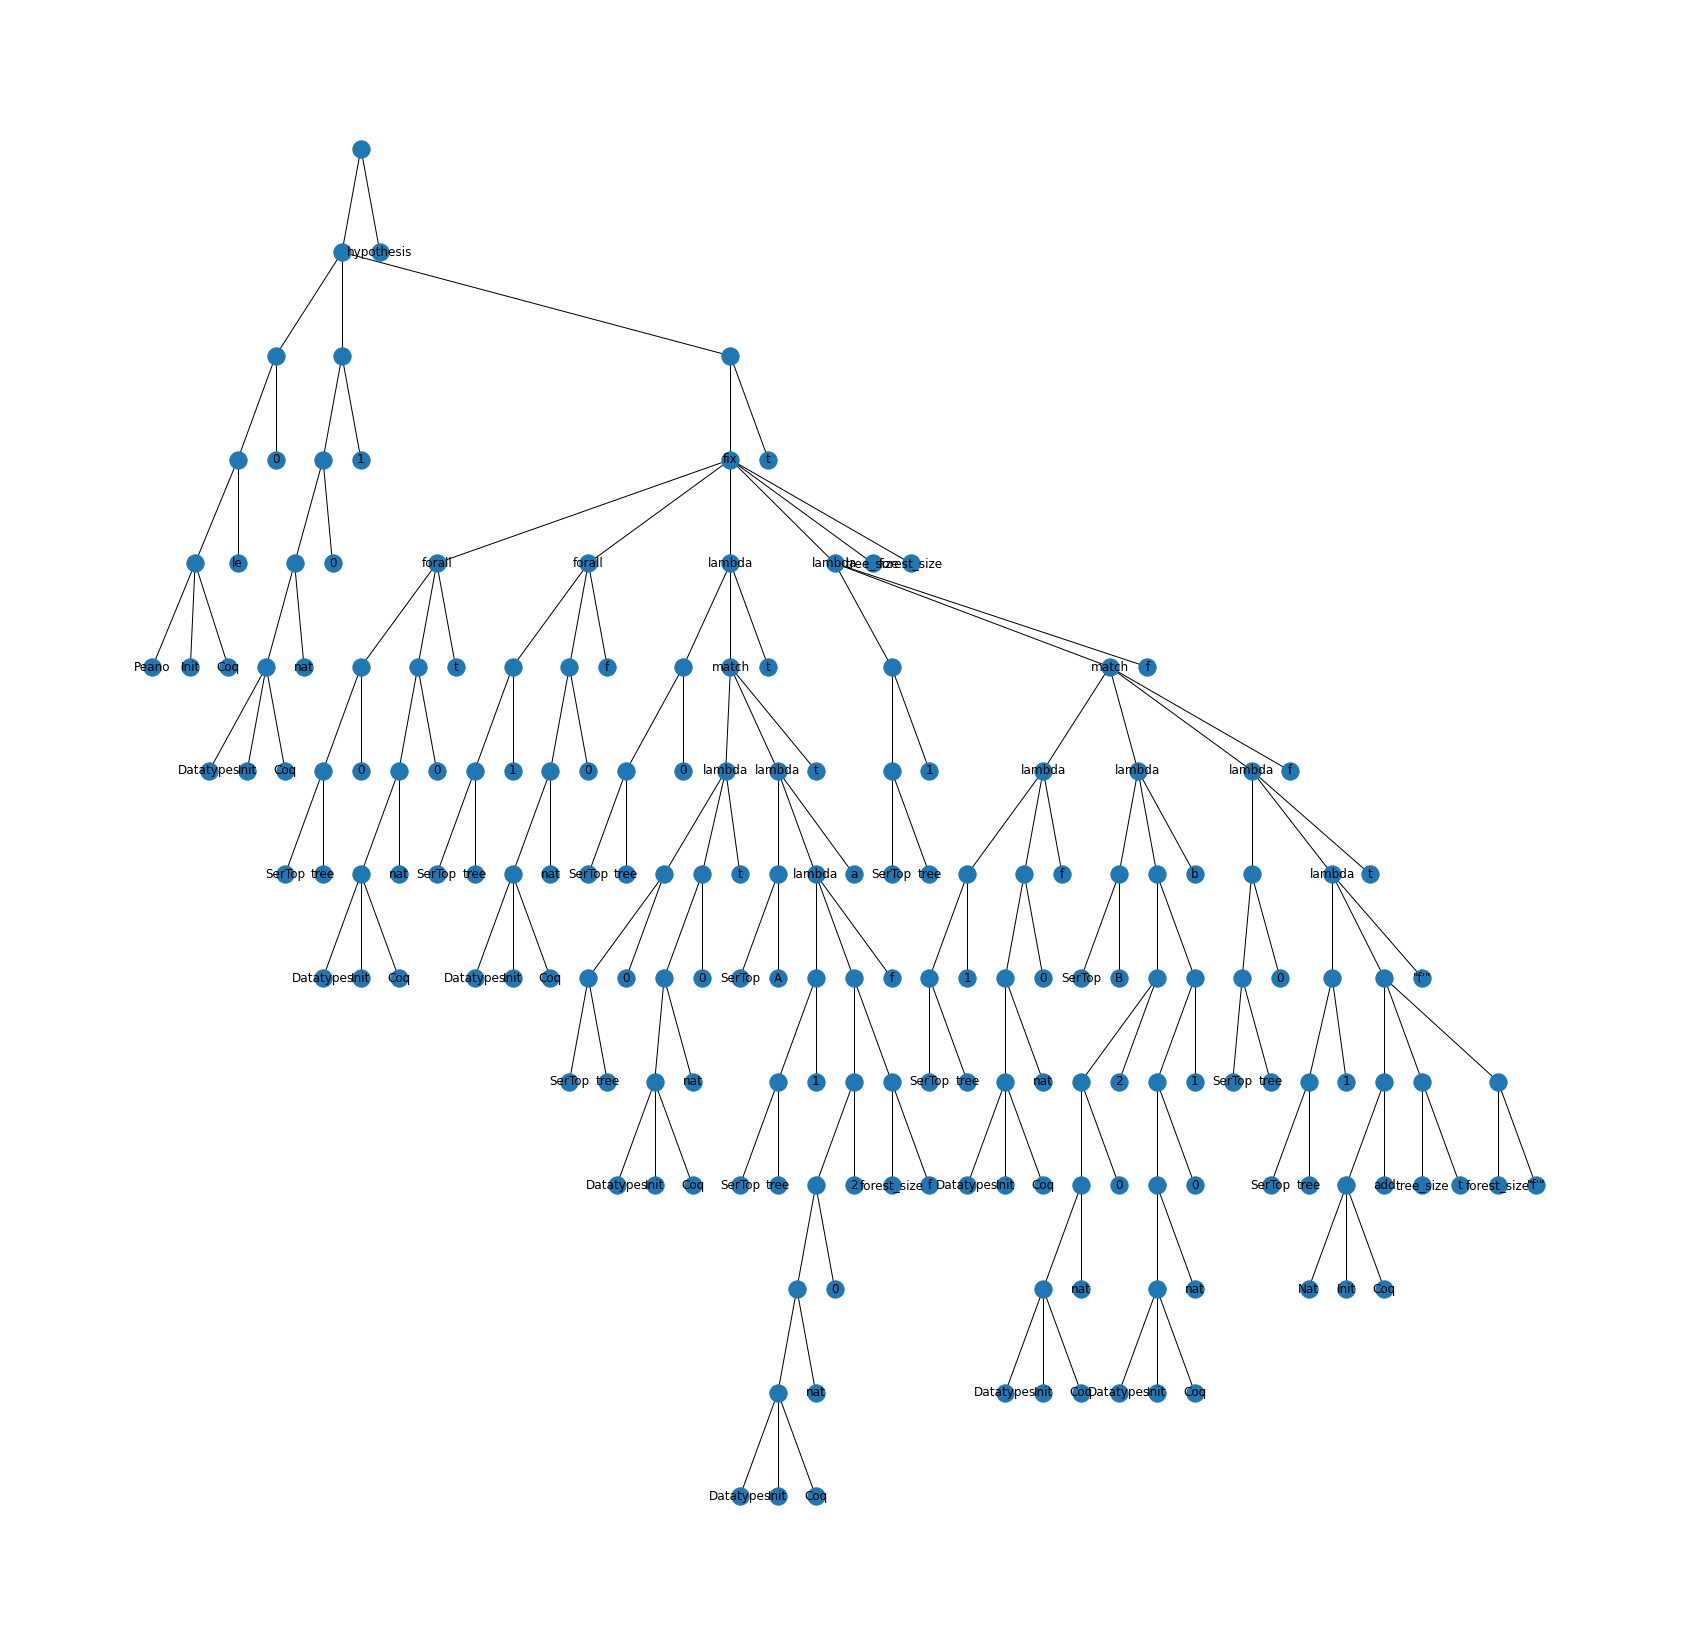

In [8]:
import matplotlib.pyplot as plt


graph = res.ast
pos = graphviz_layout(graph, prog="dot")

_, axs = plt.subplots(1,1, figsize=(30,30))

nx.draw(graph, pos, ax = axs)
labels = {node_id : token for token, node_id in zip(res.tokens, res.token_to_node.values())}
nx.draw_networkx_labels(graph, pos, labels)
print(term)

In [5]:
import pickle
!pwd
sample = pickle.load(open("../data/processed/stage1/train/00000000.pickle", "rb"))

/home/axel/Documents/master_proj/Griffon/Griffon/notebooks


In [13]:
print(sample.goal)

Stage1Statement(name='goal', tokens=('goal', 'Peano', 'Init', 'Coq', 'lt', 'Nat', 'Init', 'Coq', 'add', 'Nat', 'Init', 'Coq', 'mul', 'SerTop', 'Numerals', 'val', 'y', 'SerTop', 'exp', 'SerTop', 'Numerals', 'base', 'n0', 'SerTop', 'Numerals', 'Val', 'n0', 'l', 'Nat', 'Init', 'Coq', 'add', 'Nat', 'Init', 'Coq', 'mul', 'Nat', 'Init', 'Coq', 'pred', 'SerTop', 'Numerals', 'base', 'Lib_Exp', 'Lib_Arithmetic', 'Libraries', 'Hardware', 'exp_n', 'SerTop', 'Numerals', 'base', 'n0', 'Lib_Exp', 'Lib_Arithmetic', 'Libraries', 'Hardware', 'exp_n', 'SerTop', 'Numerals', 'base', 'n0'), ast=<networkx.classes.graph.Graph object at 0x7f5c80a90588>, token_to_node={0: 1, 1: 7, 2: 8, 3: 9, 4: 12, 5: 19, 6: 20, 7: 21, 8: 24, 9: 31, 10: 32, 11: 33, 12: 36, 13: 43, 14: 45, 15: 47, 16: 50, 17: 56, 18: 59, 19: 65, 20: 67, 21: 69, 22: 72, 23: 78, 24: 80, 25: 82, 26: 85, 27: 87, 28: 93, 29: 94, 30: 95, 31: 98, 32: 105, 33: 106, 34: 107, 35: 110, 36: 117, 37: 118, 38: 119, 39: 122, 40: 128, 41: 130, 42: 132, 43: 13

In [6]:
from griffon.preprocessing.graph.distances import DistanceBinning, ShortestPaths
from griffon.preprocessing.graph.transform import DistancesTransformer
from griffon.preprocessing.graph.binning import ExponentialBinning
from griffon.constants import NUM_BINS

N_FIXED_BINS = 9, 
EXPONENTIAL_BINNING_GROWTH_FACTOR = 1.3

distance_metrics = [ShortestPaths(threshold=100)]

db = DistanceBinning(NUM_BINS, N_FIXED_BINS, ExponentialBinning(EXPONENTIAL_BINNING_GROWTH_FACTOR))
distances_transformer = DistancesTransformer(distance_metrics, db)



In [ ]:
'(Prod (Name (Id X)) (App (Var (Id Num)) ((Var (Id n)))) (Prod (Name (Id Y)) (App (Var (Id Num)) ((Var (Id n)))) (Prod (Name (Id a)) (Var (Id A)) (App (Ind (((Mutind (MPfile (DirPath ((Id Specif) (Id Init) (Id Coq)))) (DirPath ()) (Id sig)) 0) (Instance ()))) ((Var (Id A)) (Lambda (Name (Id "a\'")) (Var (Id A)) (App (Var (Id R)) ((App (Const ((Constant (MPfile (DirPath ((Id Numerals) (Id Lib_Numerals) (Id Factorization) (Id Hardware)))) (DirPath ()) (Id exp)) (Instance ()))) ((Var (Id b)) (Var (Id n)))) (Rel 2) (App (Var (Id Val_bound)) ((Var (Id n)) (Rel 4))) (App (Var (Id Val_bound)) ((Var (Id n)) (Rel 3))) (Rel 1)))))))))'